# EXPLORING LICENSE AND LICENSE ACTIVITIES DATASETS FOR POSSIBLE RELATIONSHIPS 

Westminster has several licensing policy that governs different types of business activities run within its borders. 
The current licensing policies are as follows:
    1. Licensing Policy - Licensing Act 2003
    2. Statement of Licensing Principles - Gambling Act 2005
    3. Street Trading Licensing Policy - City of Westminster Act 1999
    4. Sex Shop Licensing Policy - Local Government (Miscellaneous Provisions Act 1982)
    5. Sexual Entertainment Venues Licensing Policy - Local Government (Miscellaneous Provisions) Act 1982
    
    source(https://www.westminster.gov.uk/licensing-policies-and-fees#licensing-fees)

# SECTION A

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
#reading stored dataframe from another notebook
%store -r df_license_activities
%store -r df_licenses
%store -r healthy_merged

The Westminster wards shapefile only has one column, which is the geometry. Using this shapefile only produces the 
Westminster wards maps without showing the labels of each ward on the map. I decided to extract the Westminster wards
from the London shapefile as it had all lables except for St James's ward which was missing from the file. After 
extracting the 19 wards of Westminster from the London shapefile (with St James's missing), I extracted St James's ward
from Westminster shapefile and added it to the other 19 wards extracted from the London shapefile to have a complete
Westminster wards to use in geographic analysis. 

In [3]:
#reading london shapefile
lndn = gpd.read_file('data/London_Ward.shp')

In [4]:
#extracting ward and geometry from a spatial join. The reason for using this is, the polygon has already been created
#so it'll be easy to extract St James's ward to add to another dataframe. 
james = healthy_merged.ix[:,['NAME','geometry']]

In [5]:
#slicing the first row which is St James's ward
stjames = james.ix[[0]]

In [6]:
#creating a list of all Westminster wards
lst = ['Abbey Road', 'Bayswater', 'Bryanston and Dorset Square',
       'Churchill', 'Church Street', 'Harrow Road', 'Hyde Park',
       'Knightsbridge and Belgravia', 'Lancaster Gate', 'Little Venice',
       'Maida Vale', 'Marylebone High Street', "Queen's Park",
       "Regent's Park", "St James's", 'Tachbrook', 'Vincent Square',
       'Warwick', 'Westbourne', 'West End']

In [7]:
#returning a dataframe containing all the above list which is also in the London shapefile
lndn1 = lndn[lndn['NAME'].isin(lst)]

In [8]:
#dropping duplicates in the dataframe which then reduces it to 19 wards instead of 20, with St James's ward missing
lndn2 = lndn1.ix[:,['NAME','geometry']].drop_duplicates('NAME')

In [9]:
#adding St James's ward to extracted London ward
complete_wards = lndn2.append(stjames).reset_index(drop=True)

In [10]:
#storing wards to use in other notebooks for spatial analysis
%store complete_wards

Stored 'complete_wards' (GeoDataFrame)


The below plot is the official wards for Westminster City Council. It is twenty in total. 

In [11]:
#renaming wards as it doesn't fit on map
#B.D.S for Bryanston and Dorset Square
#H.R for Harrow Road
complete_wards['NAME'][7] = 'B.D.S'
complete_wards['NAME'][6] = 'H.R'

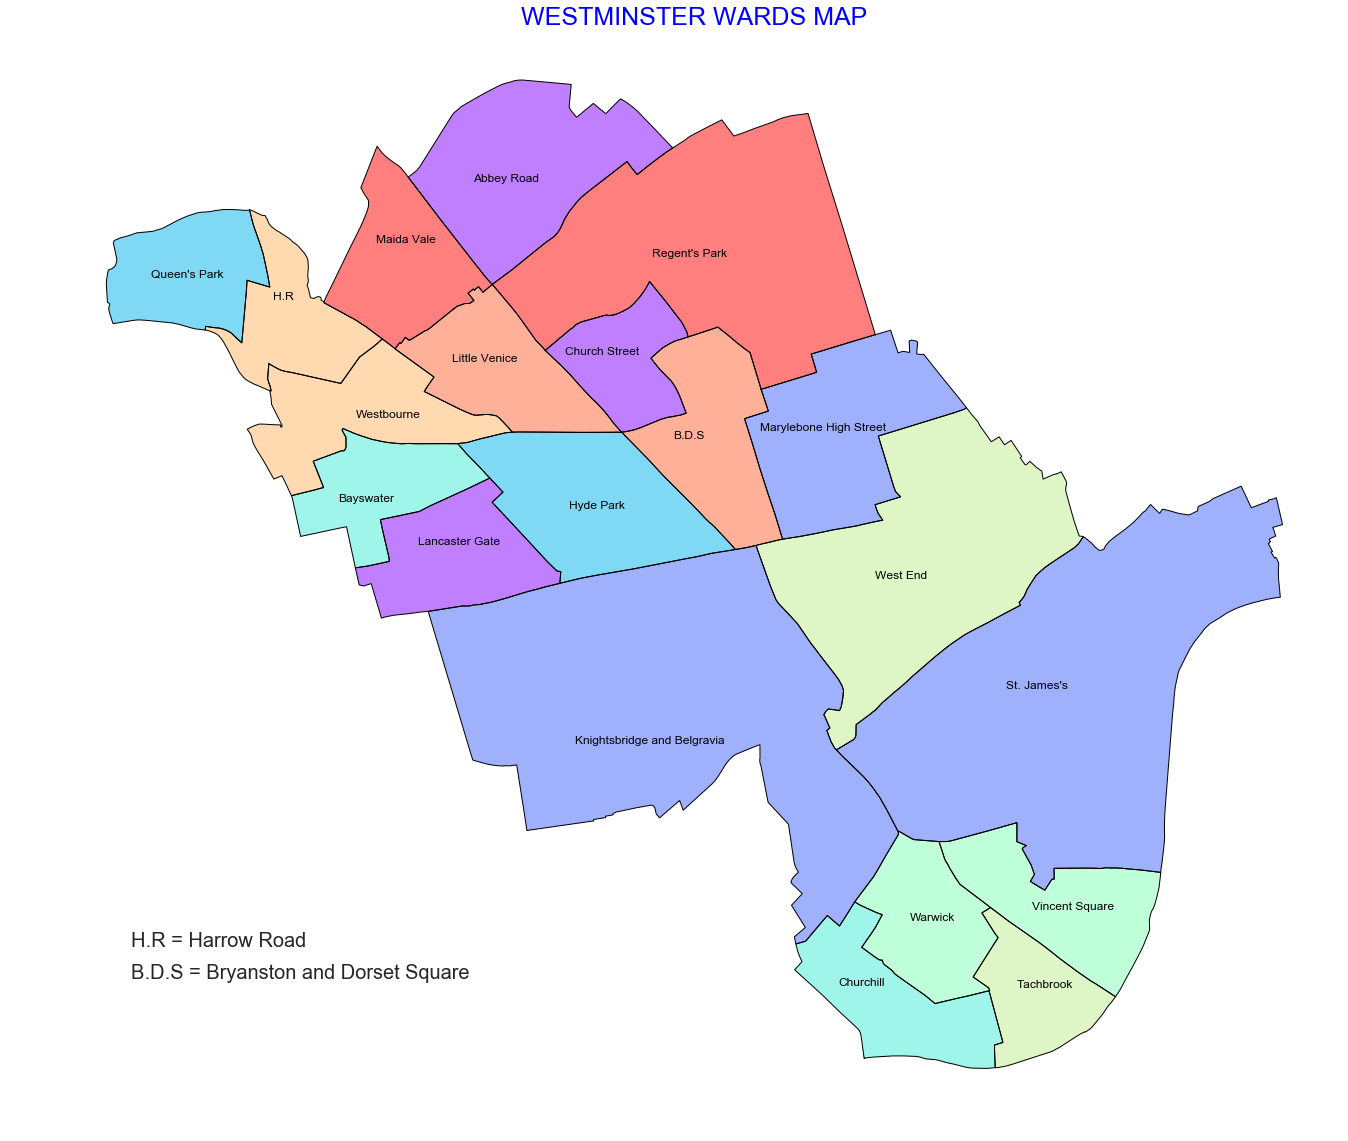

In [12]:
#plotting Westminster wards map
complete_wards.plot(legend=True,figsize=(30,20),cmap='rainbow')
plt.title('WESTMINSTER WARDS MAP',fontsize=25,alpha=1,color='blue')
plt.annotate('B.D.S = Bryanston and Dorset Square', xy=(524000, 178300), fontsize=20)
plt.annotate('H.R = Harrow Road', xy=(524000, 178500), fontsize=20)
plt.axis('off')

complete_wards['coords'] = complete_wards['geometry'].apply(lambda x: x.representative_point().coords[:])
complete_wards['coords'] = [coords[0] for coords in complete_wards['coords']]

for idx, row in complete_wards.iterrows():
    plt.annotate(s=row['NAME'], xy=row['coords'],horizontalalignment='center',color="Black",fontsize=12)
plt.savefig('/Users/jamessolomon/Desktop/plots/west_map.png',dpi=300,bbox_inches="tight")  

# SECTION B

In [13]:
#printing dataframe
df_license_activities

,Refval,LicenceApplicationKey,TradingName,ActivityType,TimePeriod,OpenTime,CloseTime,TerminalHour,TerminalHourGroup,IssuedDate,...,LNRMaxTerminalHour,RegEnt,RegEntMaxTerminalHour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,16/03358/LIPCH,75362,14,Late Night Refreshment,Thursday to Saturday,23:00,05:00,04:01 to 05:00,After Midnight,05/04/2016,...,Yes,No,No,Not Applicable,Not Applicable,Not Applicable,Thursday,Friday,Saturday,Not Applicable
1,16/03358/LIPCH,75362,14,Sale by Retail of Alcohol,Sundays before Bank Holidays,20:00,03:00,02:01 to 03:00,After Midnight,05/04/2016,...,No,No,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,16/03358/LIPCH,75362,14,Sale by Retail of Alcohol,Sunday,20:00,00:30,00:01 to 01:00,After Midnight,05/04/2016,...,NaN,No,NaN,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Sunday
3,16/03358/LIPCH,75362,14,Sale by Retail of Alcohol,Monday to Saturday,20:00,03:00,02:01 to 03:00,After Midnight,05/04/2016,...,No,No,No,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Not Applicable
4,16/03358/LIPCH,75362,14,Late Night Refreshment,Sundays before Bank Holidays,23:00,05:00,04:01 to 05:00,After Midnight,05/04/2016,...,Yes,No,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
5,16/03358/LIPCH,75362,14,Late Night Refreshment,Sunday to Wednesday,23:00,03:00,02:01 to 03:00,After Midnight,05/04/2016,...,NaN,No,NaN,Monday,Tuesday,Wednesday,Not Applicable,Not Applicable,Not Applicable,Sunday
6,16/03358/LIPCH,75362,14,Playing of Recorded Music,Sundays before Bank Holidays,20:00,06:00,Greater than 05:00,After Midnight,05/04/2016,...,No,Yes,Yes,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
7,16/03358/LIPCH,75362,14,Playing of Recorded Music,Thursday to Saturday,20:00,06:00,Greater than 05:00,After Midnight,05/04/2016,...,No,Yes,Yes,Not Applicable,Not Applicable,Not Applicable,Thursday,Friday,Saturday,Not Applicable
8,16/03358/LIPCH,75362,14,Playing of Recorded Music,Sunday to Wednesday,20:00,03:00,02:01 to 03:00,After Midnight,05/04/2016,...,NaN,Yes,NaN,Monday,Tuesday,Wednesday,Not Applicable,Not Applicable,Not Applicable,Sunday
9,16/03358/LIPCH,75362,14,Performance of Live Music,Sundays before Bank Holidays,20:00,06:00,Greater than 05:00,After Midnight,05/04/2016,...,No,Yes,Yes,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [14]:
#printing dataframe
df_licenses

,LicenceNumber,LicenceApplicationKey,TradingName,UPRN,Address,Postcode,Street,Ward,StressArea,PremisesType,ApplicationGroupSubType,IssuedDate,ApplicantName,ApplicantAddress,Lat,Long,Capacity
0,08/08312/LIPDPS,83789,Zayna Restaurant,1.000230e+11,25 New Quebec Street London W1H 7SF,W1H 7SF,New Quebec Street,Bryanston and Dorset Square,Not Recorded,Type - Restaurant,Premises,18/12/2012,The Great Mughal Limited,"25 New Quebec Street,London,W1H 7SF",51.514952,-0.158385,<50
1,08/08403/LIPT,92505,Westminster Arms,1.000230e+11,9 Storey's Gate London SW1P 3AT,SW1P 3AT,Storey's Gate,St James's,Not Recorded,Type - Public house or pub restaurant,Premises,05/03/2009,Mr G H A Barnes,"Shepherd Neame Limited ,17 Court Street ,Faver...",51.500563,-0.129890,<100
2,08/08873/LIPN,89284,Triple D Limited T/A KFC,1.003357e+10,Basement And Ground Floor 380 Edgware Road Lon...,W2 1EB,Edgware Road,Church Street,Not Recorded,Type - Takeaway food outlet,Premises,29/12/2008,Triple D Limited,"10 St Mary's Gate,London,W4 3LL,",51.521850,-0.172205,<50
3,08/09088/LIPD,73408,Khan Traders,1.000230e+11,7 Norfolk Place London W2 1QL,W2 1QL,Norfolk Place,Hyde Park,Not Recorded,Type - Shop,Premises,09/08/2010,Mr Mohamed Mushtaq Salman Khan,"7 Norfolk Place,London,W2 1QL,",51.516686,-0.172051,<50
4,08/09144/LIPD,79956,The Vintage House,1.003355e+10,Basement And Ground Floor 42 Old Compton Stree...,W1D 4TX,Old Compton Street,West End,West End,Type - Shop,Premises,13/01/2009,Mrs Diana Kalora Mullin,"The Vintage House,Ground Floor,42 Old Compton ...",51.513174,-0.131780,<50
5,08/09423/LIPDPS,79156,Chepstow Supermarket,1.000230e+11,74 Chepstow Road London W2 5BE,W2 5BE,Chepstow Road,Bayswater,Not Recorded,Type - Shop,Premises,07/01/2009,Mrs Sutharshini Kandhipan,"31 High Worple,Rayners Lane,Harrow,HA2 9SX",51.517212,-0.195552,<50
6,08/09426/LIPD,79953,Pimlico Tandoori,1.000230e+11,38 Moreton Street London SW1V 2PB,SW1V 2PB,Moreton Street,Tachbrook,Not Recorded,Type - Restaurant,Premises,23/02/2009,Mr Manik Meah,"Pimlico Tandoori Restaurant,38 Moreton Street,...",51.489076,-0.137015,<250
7,08/09443/LICV,55482,The Naval Club,1.000230e+11,38 Hill Street London W1J 5NS,W1J 5NS,Hill Street,West End,Not Recorded,Type - Club or institution,Club Certificate,30/01/2009,The Naval Club (T/A RNVR Officers),"38 Hill Street,London,W1J 5NS,",51.508367,-0.149659,<250
8,08/10074/LIPV,102700,Young Cheng Restaurant,1.000230e+11,22 Lisle Street London WC2H 7BA,WC2H 7BA,Lisle Street,St James's,West End,Type - Restaurant,Premises,29/12/2008,Mr To Yeung Tang,"7 Rees Drive,Stanmore,WC2H 7BA",51.511720,-0.130283,<100
9,08/10229/LIPDPS,85259,Champers,1.003356e+10,Basement And Ground Floor 352 Harrow Road Lond...,W9 2HT,Harrow Road,Westbourne,Not Recorded,Type - Shop,Premises,05/03/2009,Champers Wholesale Ltd,"352 Harrow Road,London,W9 2HT,",51.523169,-0.194639,<250


In [15]:
#creating copy of license
df_licenses2 = df_licenses.copy()

In [16]:
#merging license dataframes
licence = pd.merge(df_license_activities,df_licenses, on='LicenceApplicationKey', how='left')

In [17]:
#removing unwanted strings
licence['PremisesType'] = licence['PremisesType'].str.replace('Type -','')
#removing unwanted strings
licence['PremisesType'] = licence['PremisesType'].str.replace('Revised','')
#removing white space created by removing unwanted strings
licence['PremisesType'] = licence['PremisesType'].str.strip()

In [18]:
#checking contents of dataframe
licence.head(1)

,Refval,LicenceApplicationKey,TradingName_x,ActivityType,TimePeriod,OpenTime,CloseTime,TerminalHour,TerminalHourGroup,IssuedDate_x,...,Ward,StressArea,PremisesType,ApplicationGroupSubType,IssuedDate_y,ApplicantName,ApplicantAddress,Lat,Long,Capacity
0,16/03358/LIPCH,75362,14,Late Night Refreshment,Thursday to Saturday,23:00,05:00,04:01 to 05:00,After Midnight,05/04/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#checking total records in merged dataframe
len(licence)

25169

In [21]:
#selecting premises that operate in the evening
evening_night_premise  = licence[(licence.OpenTime>='18:00') & (licence.CloseTime<='04:00')]

Plotting the number of premise types that operate between the hours of 18:00 and 04:00

In [22]:
#creating dataframe of count of premise types
group = pd.DataFrame(evening_night_premise.groupby(['PremisesType'])['PremisesType'].count())

In [23]:
#renaming column
group = group.rename(columns={'PremisesType':'Total'})

In [25]:
#printing results
group

,Total
PremisesType,
Auction Rooms,1
Banks and Building Societies,2
Cafe,39
Cafe within another property,3
Casino or gambling club,7
Cinema,4
Club or institution,21
Clubhouse,5
Concert Hall,2


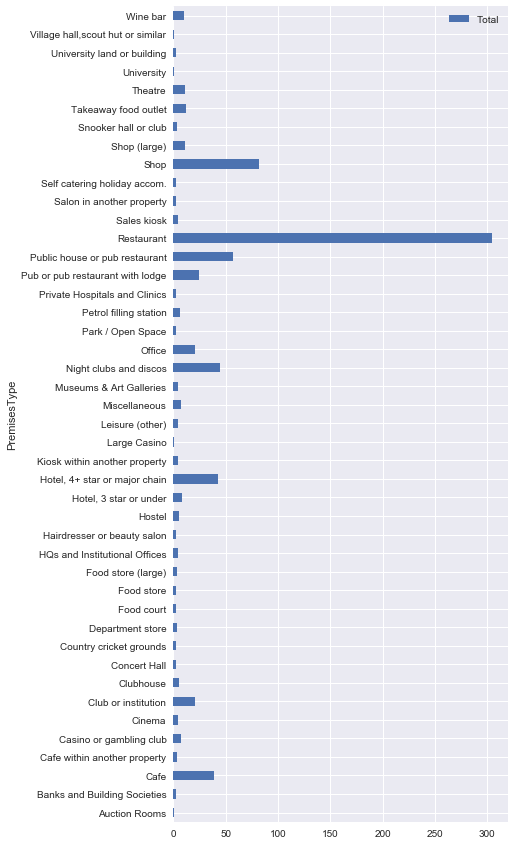

In [26]:
#plotting dataframe showing premise count
fig,ax=plt.subplots()
group.plot(kind='barh',figsize=(6,15),ax=ax)

In [27]:
#recorded time period premises operate
group_day = pd.DataFrame(evening_night_premise.groupby(['TimePeriod'])['TimePeriod'].count())

In [28]:
#renaming column
group_day = group_day.rename(columns={'TimePeriod':'Total'})

In [29]:
#printing results
group_day

,Total
TimePeriod,
Christmas Day,2
Christmas Eve,6
Friday,7
Friday to Saturday,642
Friday to Sunday,5
Good Friday,4
Monday,6
Monday to Friday,18
Monday to Saturday,1131


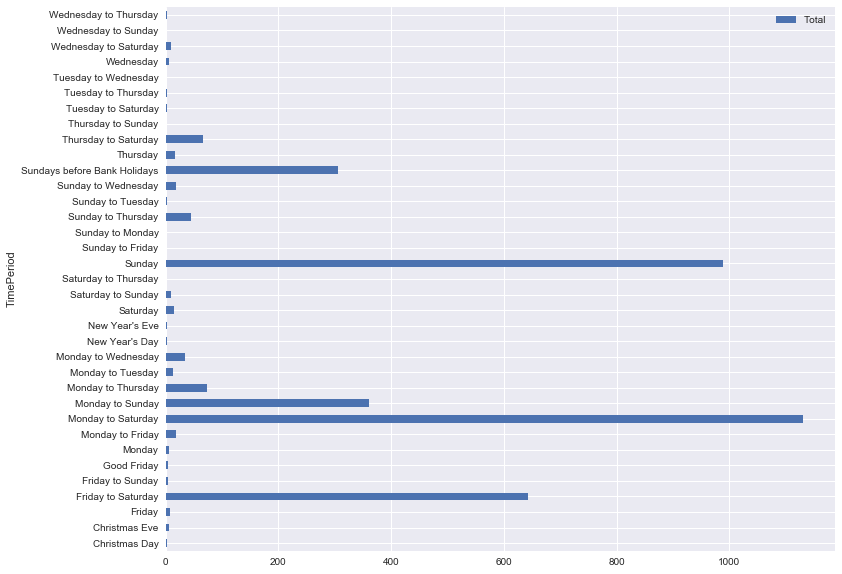

In [30]:
#plotting results of day dataframe 
group_day.plot(kind='barh',figsize=(12,10))

# SECTION C

This section is to ascertain the count of all premises licensed to sell alcohol in Westminster. The data did not reflect
true picture of the licensed premises permitted to sell liquor beverages. The reason is there was more premises not 
licensed to sell alcohol than those licensed to sell alcohol, which is not really the case evidentially, from the 
incidents of alcohol driven violence in Westminster, especially West End.

In [34]:
#premises allowed to sell alcohol
alcohol = evening_night_premise.ix[:,['Alc','Ward']]

In [32]:
#creating dataframe to show only count of alcohol in the data
alc = pd.DataFrame(alcohol.groupby('Alc')['Alc'].count())

In [37]:
#creating dataframe to show count of alcohol licensed premises per ward
alc_ward = pd.DataFrame(alcohol.groupby(['Alc','Ward'])['Alc'].count())

In [124]:
#renaming column
alc_ward = alc_ward.rename(columns={'Alc':'Total'})

In [125]:
#printing results
alc_ward

Total
Alc Ward                              
No  Abbey Road                       7
    Bayswater                       16
    Bryanston and Dorset Square     19
    Church Street                   11
    Churchill                        4
    Harrow Road                      6
    Hyde Park                       43
    Knightsbridge and Belgravia     29
    Lancaster Gate                  36
    Little Venice                    9
    Maida Vale                       7
    Marylebone High Street          55
    Not Recorded                     4
    Queen's Park                     6
    Regent's Park                   13
    St James's                     246
    Tachbrook                        1
    Vincent Square                   6
    Warwick                         13
    West End                       243
    Westbourne                       5
Yes Lancaster Gate                   1
    Regent's Park                    1

In [38]:
#renaming column
alc = alc.rename(columns={'Alc':'Total'})

In [39]:
#resetting index
alc = alc.reset_index()

In [40]:
#printing results
alc

,Alc,Total
0,No,3787
1,Yes,14


# SECTION D

This section aims to count the number of premises granted license in Westminster. The count is done for both ward and 
stress area.

In [76]:
#reading the dataframe from ALL FILES notebook file
%store -r df_license_appl

In [77]:
#printing dataframe
df_license_appl

,LicenceNumber,LicenceApplicationKey,TradingName,UPRN,Address,Postcode,Street,Ward,StressArea,PremisesType,ApplicationGroupSubType,IssuedDate,Lat,Long,Capacity,Decision,status
0,16/12878/PREAPM,158240,Not Recorded,010033635173,22 Floral Street London WC2E 9DS,WC2E 9DS,Floral Street,Not Recorded,West End,Not Recorded,Pre-App,1900-01-01,51.511919,-0.125275,Not Recorded,Not Recorded,Pending Decision
1,16/00941/PREAPD,158153,Foleys Restaurant,010033534474,23 Foley Street London W1W 6DU,W1W 6DU,Foley Street,West End,Not Recorded,Not Recorded,Pre-App,1900-01-01,51.519373,-0.140492,Not Recorded,Not Recorded,Application received
2,16/12474/PREAPD,158152,Not Recorded,010033615167,60 Chandos Place London WC2N 4HG,WC2N 4HG,Chandos Place,St James's,West End,Not Recorded,Pre-App,1900-01-01,51.510146,-0.125160,Not Recorded,Not Recorded,Pending Decision
3,17/00959/PREAPS,158316,Not Recorded,100022734777,65A Chester Square London SW1W 9DU,SW1W 9DU,Chester Square,Knightsbridge and Belgravia,Not Recorded,Not Recorded,Pre-App,1900-01-01,51.495346,-0.149048,Not Recorded,Not Recorded,Application received
4,16/01973/PREAPD,158151,Duck And Waffle,100023349315,52 Haymarket London SW1Y 4RP,SW1Y 4RP,Haymarket,St James's,West End,Not Recorded,Pre-App,1900-01-01,51.509291,-0.133035,Not Recorded,Not Recorded,Application received
5,15/06776/PREAPM,158196,Not Recorded,100023345093,1 Grosvenor Gardens London SW1W 0BG,SW1W 0BG,Grosvenor Gardens,St James's,Not Recorded,Not Recorded,Pre-App,1900-01-01,51.498117,-0.146314,Not Recorded,Not Recorded,Pending Decision
6,16/12641/PREAPM,158189,Should Be 29 Maddox,100023470852,31 Maddox Street London W1S 2PB,W1S 2PB,Maddox Street,West End,West End,Not Recorded,Pre-App,1900-01-01,51.512798,-0.142100,Not Recorded,Not Recorded,Pending Decision
7,16/11061/PREAPM,158272,Not Recorded,100023430967,38 King Street Covent Garden London WC2E 8JS,WC2E 8JS,King Street,St James's,West End,Not Recorded,Pre-App,1900-01-01,51.511960,-0.124451,Not Recorded,Not Recorded,Pending Decision
8,16/02794/PREAPM,158217,Not Recorded,010033526433,Selfridges 400 Oxford Street London W1A 1AB,W1A 1AB,Oxford Street,Marylebone High Street,Not Recorded,Not Recorded,Pre-App,1900-01-01,51.514596,-0.152851,Not Recorded,Not Recorded,Application received
9,16/00937/PREAPM,138196,Not Recorded,010033526433,Selfridges 400 Oxford Street London W1A 1AB,W1A 1AB,Oxford Street,Marylebone High Street,Not Recorded,Not Recorded,Pre-App,1900-01-01,51.514596,-0.152851,Not Recorded,Not Recorded,Application received


In [78]:
#selecting licences with the keyword grant to indicate a premise given go ahead to operate, either based on conditions
#or not
appl = df_license_appl[df_license_appl.Decision.str.contains('Grant')]

In [79]:
#printing dataframe
appl

,LicenceNumber,LicenceApplicationKey,TradingName,UPRN,Address,Postcode,Street,Ward,StressArea,PremisesType,ApplicationGroupSubType,IssuedDate,Lat,Long,Capacity,Decision,status
30,15/03953/LIPN,89958,Not Recorded,010033558185,Covent Garden London,NaN,Covent Garden,St James's,West End,Type - Shop within another property,Premises,1900-01-01,51.511998,-0.121798,Not Recorded,Granted under Delegated Authority,Invalid Application
224,07/10749/LIPT,110574,La Capannina Club,010033529408,Ground Floor Side Entrance 21 Bateman Street L...,W1D 3AL,Bateman Street,West End,West End,Not Recorded,Premises,2009-02-17,51.514257,-0.131448,Not Recorded,Granted under Delegated Authority,Licence Expired
225,15/06328/LITENP,96480,Pride Of Paddington Public House,010033532889,1-3 Craven Road London W2 3BP,W2 3BP,Craven Road,Hyde Park,Not Recorded,Not Recorded,Premises,2015-08-31,51.514928,-0.176388,Not Recorded,Notice Granted,Licence Expired
226,16/02555/LIPN,89957,Anzu,100023349439,1 - 3 Norris Street London SW1Y 4RJ,SW1Y 4RJ,Norris Street,St James's,West End,Type - Restaurant,Premises,2016-05-05,51.509190,-0.132909,Not Recorded,Granted under Delegated Authority,Licence Issued
227,15/08919/LIPN,100356,Itsu,010033529284,Ground Floor 132 Baker Street London W1U 6UA,W1U 6UA,Baker Street,Marylebone High Street,Not Recorded,Not Recorded,Premises,2016-06-15,51.521739,-0.157074,Not Recorded,Granted under Delegated Authority,Licence Expired
228,16/00864/LIPN,89955,Wagamama,100023472311,81 Dean Street London W1D 3SW,W1D 3SW,Dean Street,West End,West End,Type - Restaurant,Premises,2016-06-27,51.514357,-0.133217,Not Recorded,Granted under Delegated Authority,Licence Issued
229,16/01870/LIPN,89960,Not Recorded,100022725100,38 Bedford Street London WC2E 9EU,WC2E 9EU,Bedford Street,St James's,West End,Type - Cafe,Premises,2016-07-01,51.510578,-0.124076,Not Recorded,Granted under Delegated Authority,Licence Issued
230,15/11442/LIPN,89954,Not Recorded,100023480264,10 Queensway London W2 3RX,W2 3RX,Queensway,Lancaster Gate,Queensway and Bayswater,Type - Shop (large),Premises,2016-08-10,51.510964,-0.186965,Not Recorded,Granted by Licensing Sub Committee,Licence Issued
231,16/00517/LIPN,100691,Mnky Hse,100023473344,8 Dover Street London W1S 4LF,W1S 4LF,Dover Street,West End,Not Recorded,Not Recorded,Premises,2016-08-19,51.508060,-0.141587,Not Recorded,Granted by Licensing Sub Committee,Licence Expired
232,16/08589/LIPT,112727,Somerset Hotel,010033600091,6-7 Dorset Square London NW1 6QA,NW1 6QA,Dorset Square,Bryanston and Dorset Square,Not Recorded,Not Recorded,Premises,2016-09-13,51.523295,-0.159937,Not Recorded,Granted under Delegated Authority,Licence Expired


In [80]:
#creating dataframe of count of selected attributes
granted = pd.DataFrame(appl.groupby(['Ward','IssuedDate','Decision'])['LicenceNumber'].count())

In [81]:
#resetting index
granted_df = granted.reset_index()

In [82]:
#renaming column
granted_df = granted_df.rename(columns={'LicenceNumber':'licenceCount'})

In [83]:
#printing results
granted_df

,Ward,IssuedDate,Decision,licenceCount
0,Abbey Road,2015-03-11,Granted under Delegated Authority,1
1,Abbey Road,2015-06-04,Granted under Delegated Authority,1
2,Abbey Road,2015-08-14,Granted by Licensing Sub Committee,1
3,Abbey Road,2015-10-07,Granted under Delegated Authority,1
4,Abbey Road,2015-10-21,Granted under Delegated Authority,1
5,Abbey Road,2015-12-10,Granted under Delegated Authority,1
6,Abbey Road,2015-12-21,Granted under Delegated Authority,1
7,Abbey Road,2016-01-13,Granted under Delegated Authority,1
8,Abbey Road,2016-02-04,Granted under Delegated Authority,1
9,Abbey Road,2016-03-17,Granted under Delegated Authority,1


In [84]:
#creating a copy of dataframe to keep the original intact
lic_copy = appl.copy()

In [86]:
#creating new column to store only year
lic_copy['Year'] = pd.DatetimeIndex(lic_copy['IssuedDate']).year

In [87]:
#counting licenses granted 
grant = pd.DataFrame(lic_copy.groupby(['Ward','Year','Decision'])['LicenceNumber'].count())

In [88]:
#resetting index
grant = grant.reset_index()

In [89]:
#creating dataframe to aggregate count of granted license per ward and year
grant2 = pd.DataFrame(grant.groupby(['Ward','Year'])['LicenceNumber'].sum())

In [90]:
#resetting index
grant2 = grant2.reset_index()

In [91]:
#removing the year 1900 as it might be a typo given the unique years in dataset, i.e from 2015 to 2017
grant2 = grant2[grant2.Year!=1900]

In [92]:
#renaming column
grant2 = grant2.rename(columns={'LicenceNumber':'TotalGranted'})

In [93]:
#printing results
grant2

,Ward,Year,TotalGranted
0,Abbey Road,2015,7
1,Abbey Road,2016,8
2,Abbey Road,2017,6
4,Bayswater,2015,28
5,Bayswater,2016,27
6,Bayswater,2017,11
8,Bryanston and Dorset Square,2015,54
9,Bryanston and Dorset Square,2016,84
10,Bryanston and Dorset Square,2017,31
12,Church Street,2015,12


In [133]:
#countilg all licenses granted in Westminster
total_licenses_granted = grant2.TotalGranted.sum()

In [134]:
#printing results
total_licenses_granted

3826

In [94]:
#creating dataframe for the year 2015 
grant2_2015 = grant2[grant2.Year==2015]

In [95]:
#sorting values in descending order
grant2_2015 = grant2_2015.sort_values(by='TotalGranted',ascending=False).reset_index()

In [96]:
#dropping the index column
df_2015 = grant2_2015[:3].drop('index', axis=1)

In [97]:
#printing results
df_2015

,Ward,Year,TotalGranted
0,West End,2015,502
1,St James's,2015,399
2,Marylebone High Street,2015,105


In [98]:
#appending new row to dataframe
df_2015 = df_2015.append({'Ward':'Others(18Wards,incl NotRecorded)','Year':2015,'TotalGranted':grant2_2015.TotalGranted[3:].sum()},ignore_index=True)

In [99]:
#printing results
df_2015

,Ward,Year,TotalGranted
0,West End,2015,502
1,St James's,2015,399
2,Marylebone High Street,2015,105
3,"Others(18Wards,incl NotRecorded)",2015,371


In [100]:
#creating dataframe for the year 2016 
grant2_2016 = grant2[grant2.Year==2016]

In [101]:
#sorting values in descending order
grant2_2016 = grant2_2016.sort_values(by='TotalGranted',ascending=False).reset_index()

In [102]:
#dropping the index column
df_2016 = grant2_2016[:4].drop('index', axis=1)

In [103]:
#appending new row to dataframe
df_2016 = df_2016.append({'Ward':'Others(17Wards,incl NotRecorded)','Year':2016,'TotalGranted':grant2_2016.TotalGranted[4:].sum()},ignore_index=True)

In [104]:
#printing results
df_2016

,Ward,Year,TotalGranted
0,West End,2016,609
1,St James's,2016,578
2,Marylebone High Street,2016,136
3,Bryanston and Dorset Square,2016,84
4,"Others(17Wards,incl NotRecorded)",2016,414


In [105]:
#creating dataframe for the year 2017 
grant2_2017 = grant2[grant2.Year==2017]

In [106]:
#sorting values in descending order
grant2_2017 = grant2_2017.sort_values(by='TotalGranted',ascending=False).reset_index()

In [107]:
#dropping the index column
df_2017 = grant2_2017[:3].drop('index', axis=1)

In [108]:
#appending new row to dataframe
df_2017 = df_2017.append({'Ward':'Others(18Wards,incl NotRecorded)','Year':2017,'TotalGranted':grant2_2017.TotalGranted[3:].sum()},ignore_index=True)

In [109]:
#printing results
df_2017

,Ward,Year,TotalGranted
0,West End,2017,214
1,St James's,2017,183
2,Marylebone High Street,2017,39
3,"Others(18Wards,incl NotRecorded)",2017,190


# SECTION E

This section plots the dataframes created in section D. I used both pie chart and point plot to visualise results. The 
plots shows licences granted in the ward area and stress area.

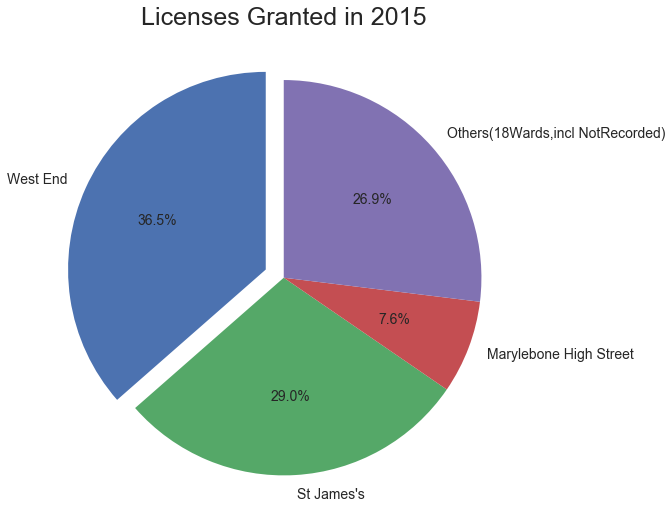

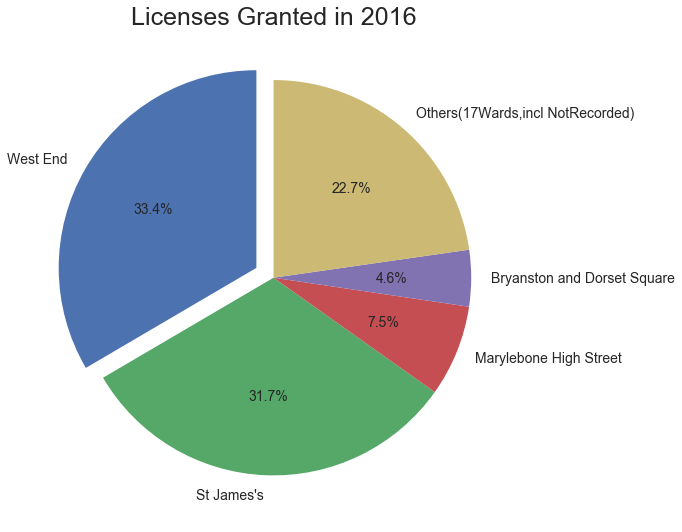

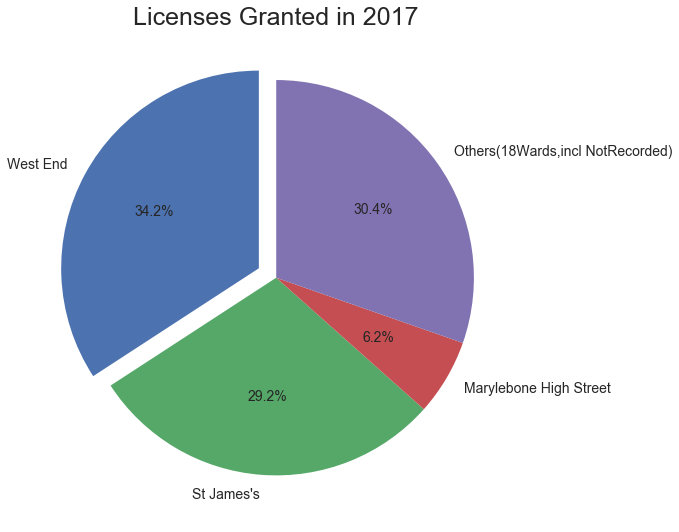

In [126]:
# plot chart 2015
plt.figure(figsize=(25,20))
explode = (0.1, 0, 0, 0)
ax1 = plt.subplot(212, aspect='equal')
df_2015.plot(kind='pie', y = 'TotalGranted', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=df_2015['Ward'], legend = False, fontsize=14,explode=explode)
plt.title('Licenses Granted in 2015',fontsize=25)
ax1.set_ylabel('')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/granted15.png',dpi=300,bbox_inches="tight")
# plot chart 2016
plt.figure(figsize=(25,20))
explode = (0.1, 0, 0, 0,0) 
ax1 = plt.subplot(211, aspect='equal')
df_2016.plot(kind='pie', y = 'TotalGranted', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=df_2016['Ward'], legend = False, fontsize=14,explode=explode)
plt.title('Licenses Granted in 2016',fontsize=25)
ax1.set_ylabel('')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/granted16.png',dpi=300,bbox_inches="tight")
# plot chart 2017
plt.figure(figsize=(25,20))
explode = (0.1, 0, 0, 0) 
ax1 = plt.subplot(211, aspect='equal')
df_2017.plot(kind='pie', y = 'TotalGranted', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=df_2017['Ward'], legend = False, fontsize=14,explode=explode)
plt.title('Licenses Granted in 2017',fontsize=25)
ax1.set_ylabel('')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/granted17.png',bbox_inches="tight")

STRESS AREA ANALYSIS

In [111]:
#counting licenses granted in stress area
stress_grant = pd.DataFrame(lic_copy.groupby(['StressArea','Year','Decision'])['LicenceNumber'].count())

In [112]:
#resetting index
stress_grant = stress_grant.reset_index()

In [113]:
#aggregating count of licenses granted for each stress area and year
stress2= pd.DataFrame(stress_grant.groupby(['StressArea','Year'])['LicenceNumber'].sum())

In [114]:
#resetting index
stress2 = stress2.reset_index()

In [115]:
#removing the year 1900 as it might be a typo
stress2 = stress2[stress2.Year!=1900]

In [116]:
#renaming column
stress2 = stress2.rename(columns={'LicenceNumber':'TotalGranted'})

In [117]:
#printing results
stress2

,StressArea,Year,TotalGranted
1,Edgware Road,2015,12
2,Edgware Road,2016,17
3,Edgware Road,2017,5
5,Not Recorded,2015,785
6,Not Recorded,2016,1051
7,Not Recorded,2017,376
9,Queensway and Bayswater,2015,44
10,Queensway and Bayswater,2016,47
11,Queensway and Bayswater,2017,23
13,West End,2009,1


The point plot is a Seaborn functionality which is useful in comparing categorical variables at different levels. It
plots the mean value of the variables. Each point shows the central tendency of the variable. 
{Central tendency describes the central position within a given dataset}

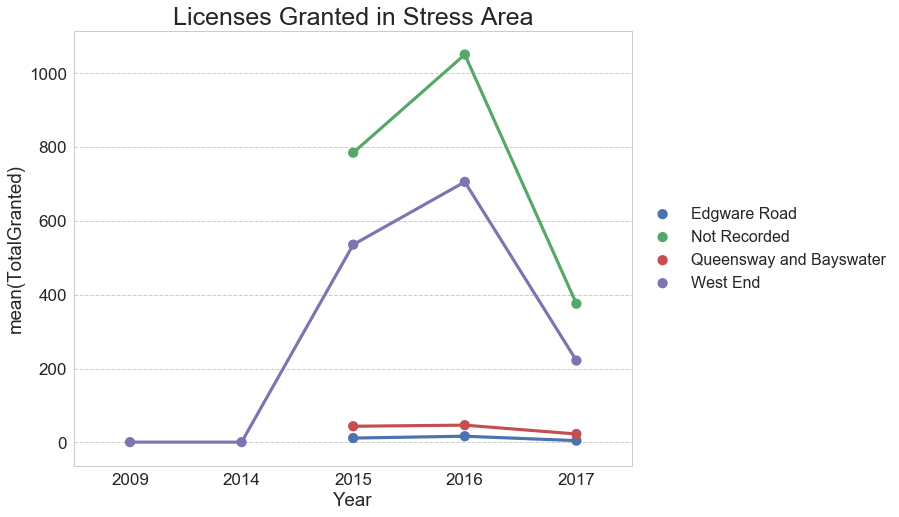

In [129]:
#creating a point plot of licenses granted for the three stress areas
sns.set(font_scale=1.7)
plt.figure(figsize=(10,8))
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.pointplot(x="Year", y="TotalGranted", hue="StressArea", data=stress2)
plt.title('Licenses Granted in Stress Area', fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/stress_lic_granted.png',bbox_inches="tight")

# SECTION F

This section creates a dataframe to join to the collected dataframe in the DATAFRAME FOR ALL notebook file. 

In [119]:
#merging licenses dataframes on LicenceApplicationKey as the common field 
license_merge = pd.merge(df_license_activities,df_licenses, on='LicenceApplicationKey', how='inner')

In [120]:
#selecting evening and night-time hours
evening_night_prm  = licence[(licence.OpenTime>='18:00') & (licence.CloseTime<='04:00')]

In [121]:
#counting total records
len(evening_night_prm)

3801

In [130]:
#creating dataframe to count licenses per ward
license_eve_ngt = pd.DataFrame(evening_night_premise.groupby('Ward')['PremisesType'].count())

In [131]:
#renaming column
license_eve_ngt = license_eve_ngt.rename(columns={'PremisesType':'Total_premises'})

In [132]:
#storing dataframe to use in DATAFRAME FOR ALL notebook file
%store license_eve_ngt

Stored 'license_eve_ngt' (DataFrame)
